<a href="https://colab.research.google.com/github/VPRR/AI-class/blob/main/PIA_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install opendatasets
! pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

import cv2
od.download(
	"https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays/data")

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list

In [92]:
import tensorflow as tf
import os

In [94]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [95]:
train_path= '/content/bone-fracture-detection-using-xrays/archive (6)/train'
test_path='/content/bone-fracture-detection-using-xrays/archive (6)/val'

In [96]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [97]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [128]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu' , input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(224, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 26, 26, 16)      

In [129]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [130]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_generator, epochs=10, validation_data=validation_generator,steps_per_epoch=100, callbacks=[tensorboard_callback])

Epoch 1/10
100/100 [==============================] - 40s 378ms/step - loss: 0.7292 - accuracy: 0.4850 - val_loss: 0.7219 - val_accuracy: 0.4317
Epoch 2/10
100/100 [==============================] - 41s 409ms/step - loss: 0.6987 - accuracy: 0.5575 - val_loss: 0.6865 - val_accuracy: 0.5550
Epoch 3/10
100/100 [==============================] - 41s 408ms/step - loss: 0.6995 - accuracy: 0.4600 - val_loss: 0.6952 - val_accuracy: 0.4533
Epoch 4/10
100/100 [==============================] - 42s 424ms/step - loss: 0.6897 - accuracy: 0.5375 - val_loss: 0.6509 - val_accuracy: 0.6333
Epoch 5/10
100/100 [==============================] - 43s 429ms/step - loss: 0.6910 - accuracy: 0.5475 - val_loss: 0.6905 - val_accuracy: 0.5150
Epoch 6/10
100/100 [==============================] - 41s 406ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5217
Epoch 7/10
100/100 [==============================] - 41s 407ms/step - loss: 0.6938 - accuracy: 0.4725 - val_loss: 0.6918 - val_ac

In [131]:
model.evaluate(train_generator)

2216/2216 [==============================] - 238s 107ms/step - loss: 0.6928 - accuracy: 0.5016


[0.6927902698516846, 0.5016360282897949]

In [132]:
model.evaluate(validation_generator)

150/150 [==============================] - 16s 107ms/step - loss: 0.6903 - accuracy: 0.5617


[0.6902591586112976, 0.5616666674613953]

1/1 [==============================] - 0s 137ms/step
[[0.5116782]]
THE UPLOADED X-RAY IMAGE IS: Normal


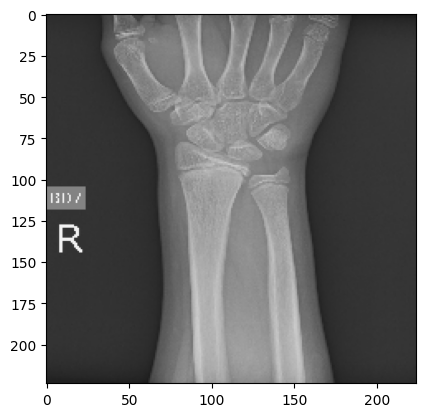

In [133]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/bone-fracture-detection-using-xrays/archive (6)/val/not fractured/1.jpg',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))

1/1 [==============================] - 0s 32ms/step
[[0.48993278]]
THE UPLOADED X-RAY IMAGE IS: Fracture


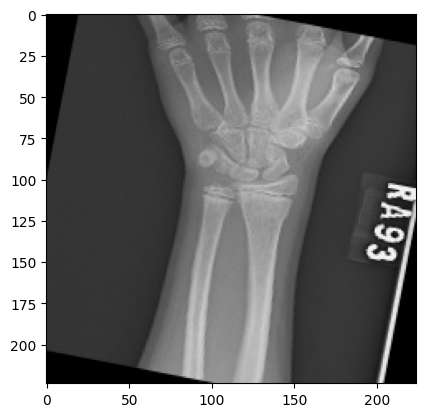

In [134]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/bone-fracture-detection-using-xrays/archive (6)/val/fractured/1-rotated1.jpg',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED X-RAY IMAGE IS: "+str(op))